# IPL Dataset Analysis

## Problem Statement
We want to know as to what happens during an IPL match which raises several questions in our mind with our limited knowledge about the game called cricket on which it is based. This analysis is done to know as which factors led one of the team to win and how does it matter.

## About the Dataset :
The Indian Premier League (IPL) is a professional T20 cricket league in India contested during April-May of every year by teams representing Indian cities. It is the most-attended cricket league in the world and ranks sixth among all the sports leagues. It has teams with players from around the world and is very competitive and entertaining with a lot of close matches between teams.

The IPL and other cricket related datasets are available at [cricsheet.org](https://cricsheet.org). Feel free to visit the website and explore the data by yourself as exploring new sources of data is one of the interesting activities a data scientist gets to do.

## About the dataset:
Snapshot of the data you will be working on:<br>
<br>
The dataset 136522 data points and 23 features<br>

|Features|Description|
|-----|-----|
|match_code|Code pertaining to individual match|
|date|Date of the match played|
|city|City where the match was played|
|venue|Stadium in that city where the match was played|
|team1|team1|
|team2|team2|
|toss_winner|Who won the toss out of two teams|
|toss_decision|toss decision taken by toss winner|
|winner|Winner of that match between two teams|
|win_type|How did the team won(by wickets or runs etc.)|
|win_margin|difference with which the team won| 
|inning|inning type(1st or 2nd)|
|delivery|ball delivery|
|batting_team|current team on batting|
|batsman|current batsman on strike|
|non_striker|batsman on non-strike|
|bowler|Current bowler|
|runs|runs scored|
|extras|extra run scored|
|total|total run scored on that delivery including runs and extras|
|extras_type|extra run scored by wides or no ball or legby|
|player_out|player that got out|
|wicket_kind|How did the player got out|
|wicket_fielders|Fielder who caught out the player by catch|



1. Breakdown an EDA into 2 parts
 - Univariate Analysis (numerical and categorical)
 - Bivariate Analysis (CC, CQ, QC, QQ)
2. Always have a question/hypothesis to work on
 - Define hypothesis/write question
 - Code & Graph
 - Derive keypoints

In [1]:
# from IPython.display import display, HTML

# display(HTML(data="""
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 65%; }
#     div#maintoolbar-container { width: 99%; }
# </style>
# """))

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset and create column `year` which stores the year in which match was played
data_ipl = pd.read_csv('../data/ipl.csv')
data_ipl['year'] = data_ipl['date'].apply(lambda x : x[:4])

In [3]:
data_ipl.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,...,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders,year
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN,2009
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN,2009
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN,2009


In [4]:
data_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   match_code       136522 non-null  int64  
 1   date             136522 non-null  object 
 2   city             136522 non-null  object 
 3   venue            136522 non-null  object 
 4   team1            136522 non-null  object 
 5   team2            136522 non-null  object 
 6   toss_winner      136522 non-null  object 
 7   toss_decision    136522 non-null  object 
 8   winner           134704 non-null  object 
 9   win_type         134704 non-null  object 
 10  win_margin       134704 non-null  float64
 11  inning           136522 non-null  int64  
 12  delivery         136522 non-null  float64
 13  batting_team     136522 non-null  object 
 14  batsman          136522 non-null  object 
 15  non_striker      136522 non-null  object 
 16  bowler           136522 non-null  obje

In [5]:
data_ipl.isnull().sum()/len(data_ipl) * 100

match_code          0.000000
date                0.000000
city                0.000000
venue               0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
winner              1.331654
win_type            1.331654
win_margin          1.331654
inning              0.000000
delivery            0.000000
batting_team        0.000000
batsman             0.000000
non_striker         0.000000
bowler              0.000000
runs                0.000000
extras              0.000000
total               0.000000
extras_type        94.537144
player_out         95.081379
wicket_kind        95.081379
wicket_fielders    96.436472
year                0.000000
dtype: float64

***Observations:***
 - `extras_type`, `player_out`, `wicket_kind`, `wicket_fielders` have more than 90% of the values are null
 - These are null in nature because we do not have extras, wickets etc. at every ball.
 - `winner` has also null values and it could be draw

In [6]:
# How many unique matches do we have in data
print('Unique matches: ', data_ipl['match_code'].nunique())

# How many unique teams do we have in data
print('Unique teams: ', data_ipl['team1'].nunique())

Unique matches:  577
Unique teams:  13


In [7]:
# Unique values for year
sorted(data_ipl['year'].unique())

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [8]:
# Looking at data where there are no winners
draws = data_ipl[data_ipl['winner'].isnull()]

In [9]:
# Verify that score for both innings is same scores
draws_pivot = draws.pivot_table(index='match_code', columns='inning', values='total', aggfunc='sum')
draws_pivot

inning,1,2
match_code,,
392190,150.0,150.0
419121,136.0,136.0
501265,56.0,NaN
598004,130.0,130.0
598017,152.0,152.0
729315,152.0,152.0
829741,191.0,191.0
829763,200.0,NaN
829813,187.0,2.0


Some of the match may have abandon due to weather condition so 2nd inning was not played

In [10]:
def draw_type(runs1, runs2):
    if runs1==runs2:
        return 'decide_superover'
    else:
        return 'match_abandoned'

In [11]:
draws_pivot['draw_outcome'] = draws_pivot.apply(lambda x: draw_type(x[1], x[2]), axis=1)
draws_pivot

inning,1,2,draw_outcome
match_code,,,
392190,150.0,150.0,decide_superover
419121,136.0,136.0,decide_superover
501265,56.0,NaN,match_abandoned
598004,130.0,130.0,decide_superover
598017,152.0,152.0,decide_superover
729315,152.0,152.0,decide_superover
829741,191.0,191.0,decide_superover
829763,200.0,NaN,match_abandoned
829813,187.0,2.0,match_abandoned


In [12]:
# Create a dict of match code and draw outcome
draws_dict = draws_pivot[['draw_outcome']]['draw_outcome'].to_dict()
draws_dict

{392190: 'decide_superover',
 419121: 'decide_superover',
 501265: 'match_abandoned',
 598004: 'decide_superover',
 598017: 'decide_superover',
 729315: 'decide_superover',
 829741: 'decide_superover',
 829763: 'match_abandoned',
 829813: 'match_abandoned'}

In [13]:
def win_info(match_code, winner):
    if match_code not in draws_dict.keys():
        return winner
    
    return draws_dict[match_code]

In [14]:
data_ipl['winner'] = data_ipl.apply(lambda x: win_info(x['match_code'], x['winner']), axis=1)
data_ipl['winner'].unique()

array(['Mumbai Indians', 'Deccan Chargers', 'Chennai Super Kings',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Kochi Tuskers Kerala', 'Gujarat Lions',
       'Kings XI Punjab', 'decide_superover', 'match_abandoned',
       'Rising Pune Supergiants'], dtype=object)

In [15]:
# Fill null values
# Win margin to be set to 0 if match is draw
# Set win_type to draw

data_ipl['win_margin'].fillna(0, inplace=True)
data_ipl['win_type'].fillna('draw', inplace=True)

data_ipl.isnull().sum()

match_code              0
date                    0
city                    0
venue                   0
team1                   0
team2                   0
toss_winner             0
toss_decision           0
winner                  0
win_type                0
win_margin              0
inning                  0
delivery                0
batting_team            0
batsman                 0
non_striker             0
bowler                  0
runs                    0
extras                  0
total                   0
extras_type        129064
player_out         129807
wicket_kind        129807
wicket_fielders    131657
year                    0
dtype: int64

### Plot the wins gained by teams across all seasons

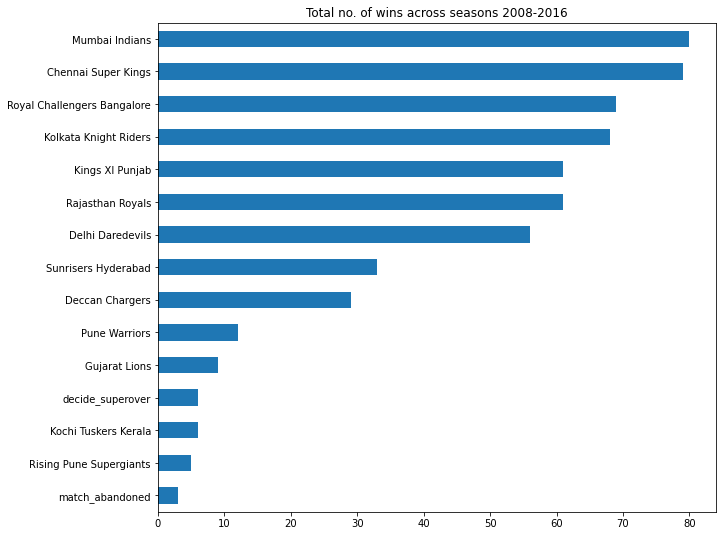

In [16]:
# Plot the wins gained by teams across all seasons
match_wise_data = data_ipl.drop_duplicates(subset='match_code', keep='first').reset_index(drop=True)
total_wins = match_wise_data['winner'].value_counts()
total_wins.sort_values().plot.barh(title='Total no. of wins across seasons 2008-2016', figsize=(10, 9))
plt.show()

### Plot Number of matches played by each team through all seasons

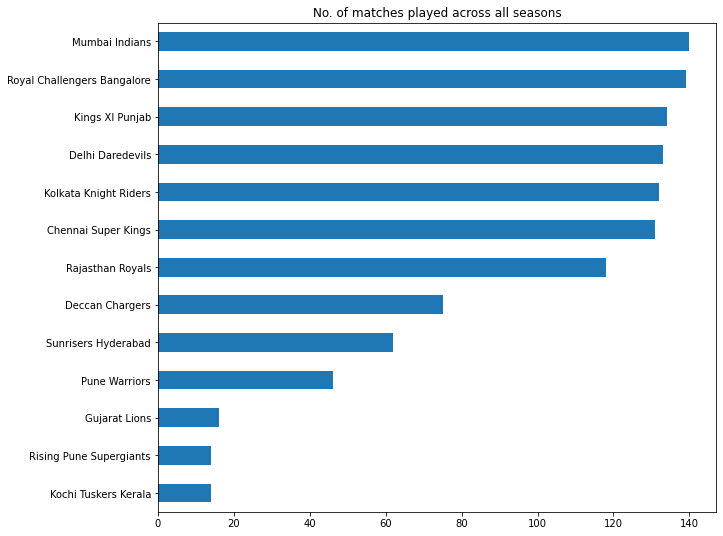

In [17]:
# Plot Number of matches played by each team through all seasons
team_data = pd.melt(match_wise_data, id_vars=['match_code', 'year'], value_vars=['team1', 'team2'])
matches_played = team_data.value.value_counts().sort_values()
matches_played.plot.barh(x=matches_played.index, y=matches_played, title='No. of matches played across all seasons', figsize=(10, 9))
plt.show()

### Performance of top bowlers over seasons

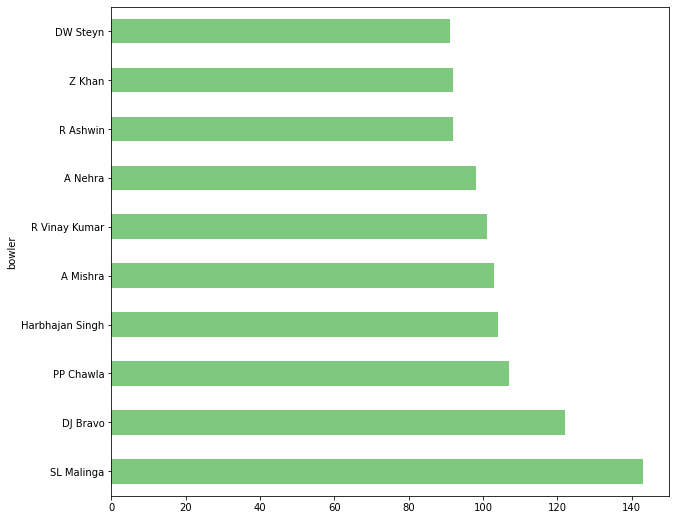

In [18]:
# Performance of top bowlers over seasons
wickets = data_ipl[(data_ipl['wicket_kind']=='bowled')|(data_ipl['wicket_kind']=='caught')|(data_ipl['wicket_kind']=='lbw')|(data_ipl['wicket_kind']=='caught and bowled')]
bowlers_wickets = wickets.groupby('bowler')['wicket_kind'].count().sort_values(ascending=False)[:10]
bowlers_wickets.plot.barh(colormap = 'Accent', figsize=(10, 9))
plt.show()

### How did the different pitches behave? What was the average score for each stadium?

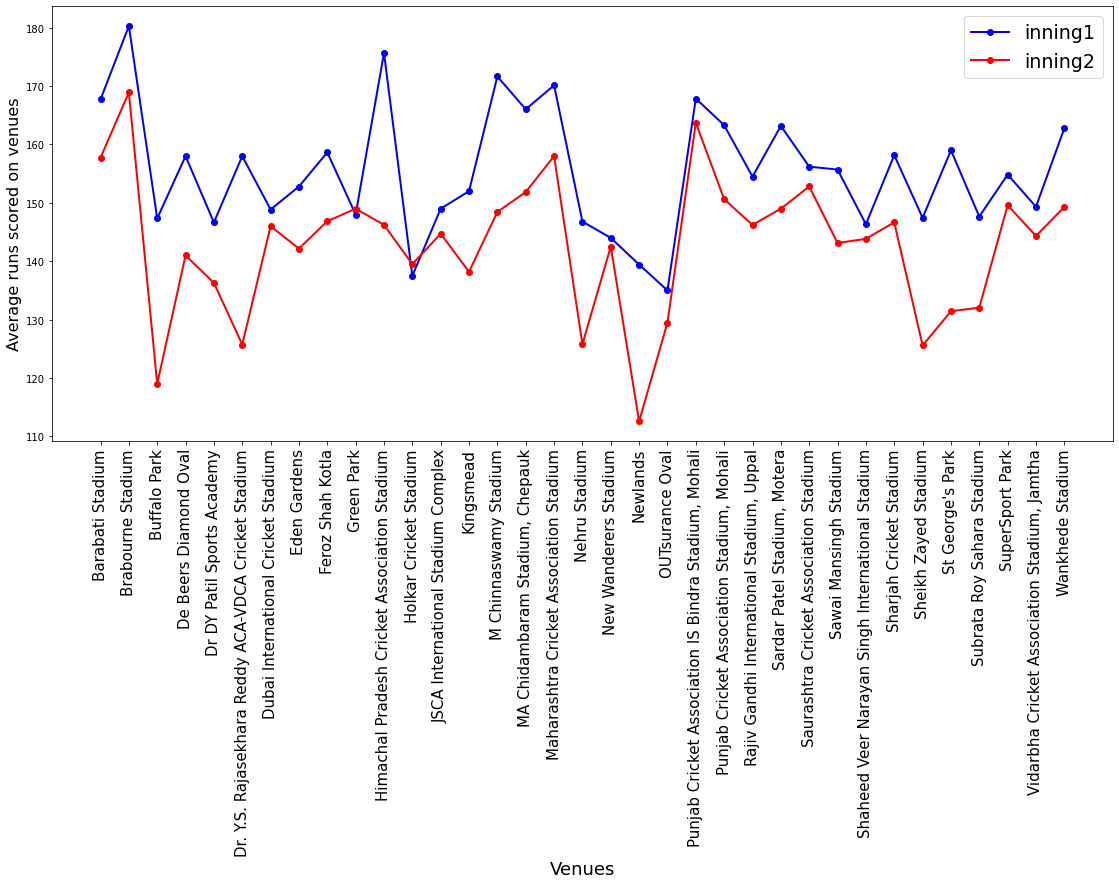

In [19]:
score_per_venue = data_ipl.loc[:, ['match_code', 'venue', 'inning', 'total']]
average_score_per_venue = score_per_venue.groupby(['match_code', 'venue', 'inning']).agg({'total' : 'sum'}).reset_index()
average_score_per_venue = average_score_per_venue.groupby(['venue', 'inning'])['total'].mean().reset_index()
#average_score_per_venue = average_score_per_venue[(average_score_per_venue['inning'] == 1) | (average_score_per_venue['inning'] == 2)]

plt.figure(figsize=(19, 8))
plt.plot(average_score_per_venue[average_score_per_venue['inning']==1]['venue'], average_score_per_venue[average_score_per_venue['inning']==1]['total'], '-b', marker='o', ms=6, lw=2, label='inning1')
plt.plot(average_score_per_venue[average_score_per_venue['inning']==2]['venue'], average_score_per_venue[average_score_per_venue['inning']==2]['total'], '-r', marker='o', ms=6, lw=2, label='inning2')
plt.legend(loc = 'upper right', fontsize = 19)
plt.xticks(fontsize = 15, rotation=90)
plt.xlabel('Venues', fontsize=18)
plt.ylabel('Average runs scored on venues', fontsize=16)
plt.show()

### Types of Dismissal and how often they occur

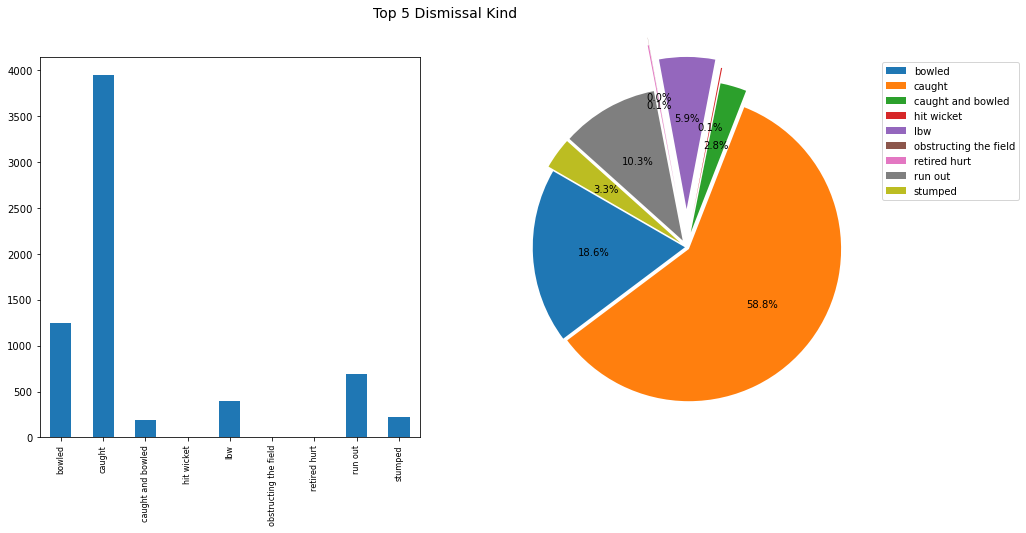

In [20]:
# Types of Dismissal and how often they occur
dismissed = data_ipl.groupby(['wicket_kind']).count().reset_index()
dismissed = dismissed[['wicket_kind', 'delivery']]
dismissed = dismissed.rename(columns={'delivery' : 'count'})

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
f.suptitle("Top 5 Dismissal Kind", fontsize=14)

dismissed.plot.bar(ax=ax1, legend=False)
ax1.set_xticklabels(list(dismissed['wicket_kind']), fontsize=8)

explode =[0.01, 0.02, 0.1, 0.2, 0.25, 0.4, 0.35, 0.05, 0.05]
properties = ax2.pie(dismissed['count'], labels=None, startangle=150, autopct='%1.1f%%', explode = explode)
ax2.legend(bbox_to_anchor=(1,1), labels=dismissed['wicket_kind'])
plt.show()

### Plot no. of boundaries across IPL seasons

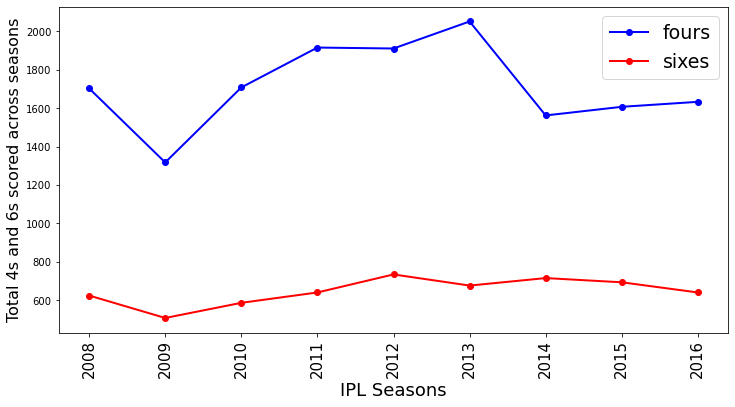

In [21]:
# Plot no. of boundaries across IPL seasons
boundaries_data = data_ipl.loc[:,['runs','year']]

boundary_fours = boundaries_data[boundaries_data['runs']==4]
fours = boundary_fours.groupby('year')['runs'].count()
boundary_sixes = boundaries_data[boundaries_data['runs']==6]
sixes = boundary_sixes.groupby('year')['runs'].count()

plt.figure(figsize=(12, 6))
plt.plot(fours.index, fours, '-b', marker='o', ms=6, lw=2, label='fours')
plt.plot(sixes.index, sixes, '-r', marker='o', ms=6, lw=2, label='sixes')
plt.legend(loc='upper right', fontsize=19)
plt.xticks(fontsize=15, rotation=90)
plt.xlabel('IPL Seasons', fontsize=18)
plt.ylabel('Total 4s and 6s scored across seasons', fontsize=16)
plt.show()

### What are the average statistics across all seasons?

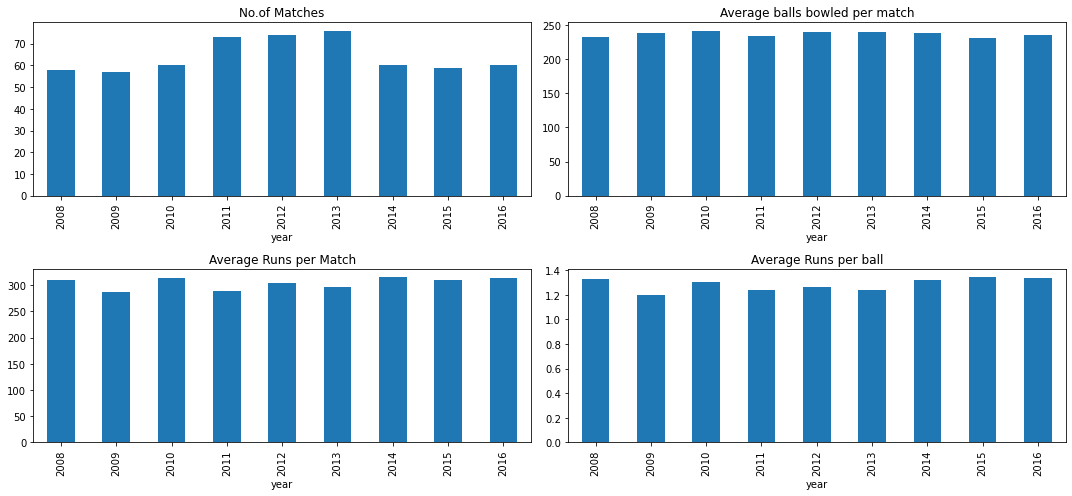

In [22]:
# Average statistics across all seasons
# Drop duplicates because of we have same match code for both the innings for same match
per_match_data = data_ipl.drop_duplicates(subset='match_code', keep='first').reset_index(drop=True)

total_runs_per_season = data_ipl.groupby('year')['total'].sum()
balls_delivered_per_season = data_ipl.groupby('year')['delivery'].count()
no_of_match_played_per_season = per_match_data.groupby('year')['match_code'].count()

avg_balls_per_match = balls_delivered_per_season/no_of_match_played_per_season
avg_runs_per_match = total_runs_per_season/no_of_match_played_per_season
avg_runs_per_ball = total_runs_per_season/balls_delivered_per_season

fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.flatten()

no_of_match_played_per_season.plot(kind='bar', ax=ax[0], title='No.of Matches')
avg_balls_per_match.plot(kind='bar', ax=ax[1], title='Average balls bowled per match')
avg_runs_per_match.plot(kind='bar', ax=ax[2], title='Average Runs per Match')
avg_runs_per_ball.plot(kind='bar', ax=ax[3], title='Average Runs per ball')

plt.tight_layout()
plt.show()